# Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos


Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---



Cargamos las librerías que vamos a utilizar:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para gráficos
from statsmodels.stats.weightstats import DescrStatsW # Para análisis de varianza
import math # Para logaritmos
import os # Para cambiar directorios para los que trabajen de forma local en sus computadoras

Establecemos conexión con Google Drive, para leer archivos. Si están trabajando con otro editor que no sea Colab saltar este paso, saltar este paso.

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la tabla
%cd "drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Si quieren trabajar con un editor en su computadora, tienen que primero asegurarse de que tienen instalados los paquetes nececsarios. Para ello tienen que abrir la terminal, escriben en su buscador "cmd" y debería aparecerles algo como "Símbolo del sistema" y una vez dentro tienen que escribir "pip install paquete" por ejemplo si quiero instalar pandas escribo "pip install pandas".

Ahora bien, tienen que setear su directorio en la carpeta donde tengan guardadas las bases que vamos a usar.

In [ ]:
os.chdir("h:/Mi unidad/Diplomatura Ciencia de Datos - FaCENA (No compartir)")
os.getcwd()

# Práctica 1. Base celulares.

Cargamos la base de datos:

In [ ]:
datos = pd.read_excel("Bases/Base_celulares.xlsx")
datos.head()

,Apell_Nom,Edad,Sexo,Marca_celu,Modelo,Precio,Satisfacc,Notebook,Tablet,Ingreso,casado_unido,N_Hijos,Alquila,Nivel_Edu
0,Carmen Vega,37,0,Huawei,QI8U8350-51,2000.0,8,0,0,7000,1.0,2.0,0.0,Secundario
1,Carmen Vega,30,0,Samsung,GALAXI S4 MINI,5000.0,10,0,1,15000,0.0,1.0,1.0,Terciario
2,Ezequiel Velazco,24,1,Nokia,c3,1300.0,7,1,0,5000,0.0,0.0,0.0,Universitario
3,Ezequiel Velazco,28,1,Samsung,s4 mini,5000.0,10,1,1,13000,1.0,0.0,0.0,Posgrado
4,Ezequiel Velazco,24,1,Samsung,s4 mini,5000.0,9,1,0,0,1.0,1.0,1.0,Secundario


## Descripción de variables

* **Apell_Nom**: Apellido y nombre del encuestador

* **Edad**: Edad del encuestado

* **Sexo**: Mujer=1, Hombre=0

* **Marca_celu**: Marca del celular

* **Modelo**: Modelo del celular

* **Precio**: Precio del celular nuevo en Mercado Libre (liberado)

* **Satisfacc**: Nivel de satisfacción de 1 a 10

* **Notebook**: Tiene notebook=1, No tiene=0

* **Tablet**: Tiene tablet pc=1, No tiene=0

* **Ingreso**: Ingreso mensual promedio (aproximado)

* **casado_unido**: Casado o unido=1, No=0

* **N_Hijos**: Número de hijos

* **Alquila**: Si alquila vivienda=1, No alquila vivienda=0

* **Nivel_Edu**: Nivel de educación formal completada

Realizamos un primer conteo para visualizar la cantidad de celulares por marca.

In [ ]:
datos['Marca_celu'].value_counts()

Marca_celu
Samsung         85
Nokia           39
Motorola        27
BlackBerry      21
LG              14
Apple            5
Sony Ericson     4
Huawei           2
Name: count, dtype: int64

Para facilitar el análisis lo que hacemos a continuación es reclasificar las marcas con menor participacón en la categoría "Otros".

In [ ]:
datos['Marca_celu'] = datos['Marca_celu'].apply(
    lambda x: 'Otros' if x in ['LG','Apple','Sony Ericson','Huawei'] else x)
datos['Marca_celu'].value_counts()

Marca_celu
Samsung       85
Nokia         39
Motorola      27
Otros         25
BlackBerry    21
Name: count, dtype: int64

Graficamos un Box Plot o Gráfico de caja. Este nos muestra la siguiente información:
* Los bordes de las cajas representan los cuartiles 1 y 3, siendo el primer cuartil el 25% de los datos y el tercero el 75%.
* Luego tenemos que tener en cuenta el rango intercuartílico que es la diferencia entre el quartil 3 y 1: RIC = Q3 - Q1.
* Con ayuda de este rango construimos los "bigotes" de la caja, estando estos a una distancia de 1.5 de los límites de la caja.
* Fuera de éstos límites se encuentran los valores considerados atípicos. En el caso de que los valores mínimos y máximos se encuentren dentro del rango IC, éstos valores seran en consecuencia los nuevos límites.

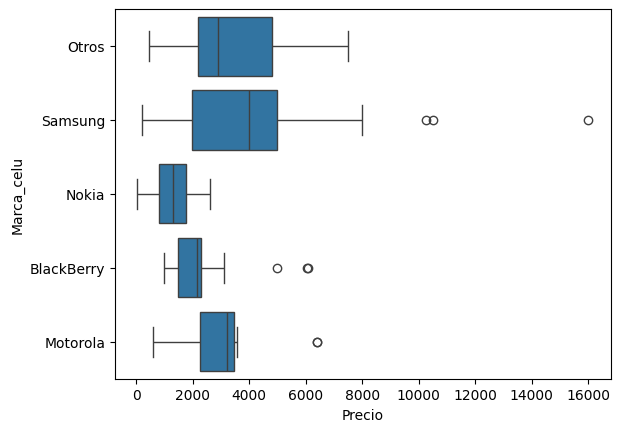

In [ ]:
sns.boxplot(x=datos['Precio'], y = datos['Marca_celu'])
plt.show()

## Distribución de frecuencias - Variables discretas

Podemos tomar como caso de ejemplo para variable discreta el nivel de satisfacción del usuario, siendo que esta variable puede tomar solo valores enteros positivos del 1 al 10.

In [ ]:
tabla = pd.DataFrame()
tabla['X'] = datos['Satisfacc'].value_counts().index
tabla['Frec_absolutas'] = datos['Satisfacc'].value_counts().values
tabla['Frec_relativas'] = datos['Satisfacc'].value_counts(normalize=True).values
tabla = tabla.sort_values('X')
tabla['Acum_absolutas'] = tabla['Frec_absolutas'].cumsum()
tabla['Acum_relativas'] = tabla['Frec_relativas'].cumsum()
tabla

,X,Frec_absolutas,Frec_relativas,Acum_absolutas,Acum_relativas
7,2,1,0.005076,1,0.005076
6,4,4,0.020305,5,0.025381
5,5,9,0.045685,14,0.071066
3,6,20,0.101523,34,0.172589
1,7,46,0.233503,80,0.406091
0,8,67,0.340102,147,0.746193
2,9,33,0.167513,180,0.913706
4,10,17,0.086294,197,1.000000


Ahora graficamos un histograma para apreciar mejor la información de la tabla.
Algunos de los parámetros que podemos usar son:
* **bins** para definir la cantidad de barras o cortes que queremos hacer.
* **stat**: que puede asumir varios valores entre ellos "count" si queremos un conteo por cada intervalo, o por el contrario "probability" si queremos la probabilidad.

Para más información mirar la documentación de la función:
https://seaborn.pydata.org/generated/seaborn.histplot.html

Text(0.5, 1.0, 'Histograma del Nivel de Satisfacción')

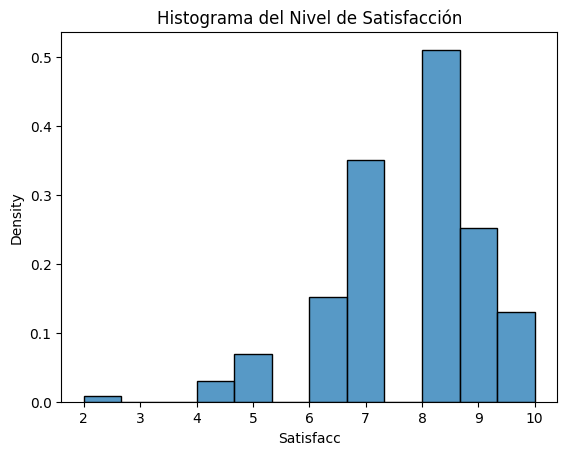

In [ ]:
sns.histplot(datos['Satisfacc'], stat = "density").set_title("Histograma del Nivel de Satisfacción")

## Distribución de frecuencias - Variables continuas

Para el caso de la variable continua podemos usar tanto el ingreso como el precio. Para este ejemplo nos centraremos en el ingreso.

In [ ]:
tabla = pd.DataFrame()
tabla['X'] = datos['Ingreso'].value_counts(bins=10, sort=False).index
tabla['Frec_absolutas'] = datos['Ingreso'].value_counts(bins=10, sort=False).values
tabla['Acum_absolutas'] = tabla['Frec_absolutas'].cumsum()
tabla['Frec_relativas'] = datos['Ingreso'].value_counts(bins=10, sort=False, normalize=True).values
tabla['Acum_relativas'] = tabla['Frec_relativas'].cumsum()
tabla

,X,Frec_absolutas,Acum_absolutas,Frec_relativas,Acum_relativas
0,"(-45.001, 4500.0]",28,28,0.142132,0.142132
1,"(4500.0, 9000.0]",83,111,0.421320,0.563452
2,"(9000.0, 13500.0]",41,152,0.208122,0.771574
3,"(13500.0, 18000.0]",24,176,0.121827,0.893401
4,"(18000.0, 22500.0]",9,185,0.045685,0.939086
5,"(22500.0, 27000.0]",7,192,0.035533,0.974619
6,"(27000.0, 31500.0]",2,194,0.010152,0.984772
7,"(31500.0, 36000.0]",2,196,0.010152,0.994924
8,"(36000.0, 40500.0]",0,196,0.000000,0.994924
9,"(40500.0, 45000.0]",1,197,0.005076,1.000000


Histograma de ingresos.

Text(0.5, 1.0, 'Histograma del Ingreso')

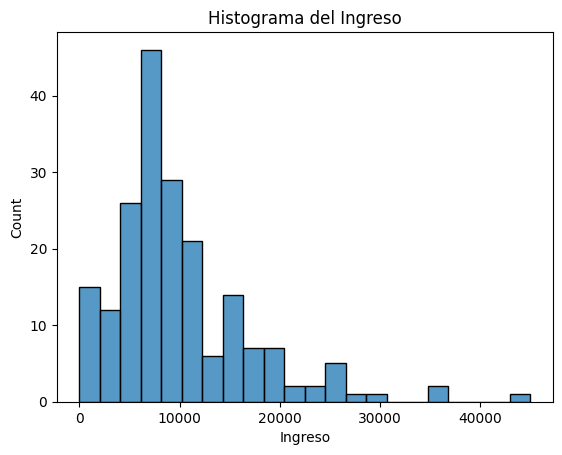

In [ ]:
sns.histplot(datos['Ingreso'], stat = "count").set_title("Histograma del Ingreso")

## Medidas de tendencia central - Media

Calculamos la media de la variable ingresos tanto de forma manual como haciendo uso de las funciones que ya nos provee Python.

In [ ]:
suma_ingresos = sum(datos['Ingreso'])
n = len(datos['Ingreso'])
media_muestral = suma_ingresos/n

media_muestral

10003.22842639594

In [ ]:
datos['Ingreso'].mean()

10003.22842639594

##Medidas de dispersión - Varianza y desvío estandar

Para obtener la varianza de forma manual, primero obtenemos la suma de las diferencias entre cada valor de ingreso y la media. Luego la elevamos al cuadrado y dividimos por la cantida de registros menos uno (n-1).

In [ ]:
suma_cuadrada = sum((datos['Ingreso'] - media_muestral)**2)
varianza_muestral = suma_cuadrada/(n-1)
varianza_muestral

48506936.34041229

In [ ]:
datos['Ingreso'].var()

48506936.340412304

In [ ]:
desvio_estandar_muestral = np.sqrt(varianza_muestral)
desvio_estandar_muestral

6964.692121006664

In [ ]:
datos['Ingreso'].std()

6964.692121006664

## Dispersión relativa

Calculamos la dispersión para dos variables distintas y las comparamos.

In [ ]:
ing_media = datos['Ingreso'].mean()
ing_sd = datos['Ingreso'].std()
print(f'Media del ingreso: {ing_media}')
print(f'Desvío estándar del ingreso: {ing_sd}')

Media del ingreso: 10003.22842639594
Desvío estándar del ingreso: 6964.692121006664


In [ ]:
satisfaccion_media = datos['Satisfacc'].mean()
satisfaccion_varianza = datos['Satisfacc'].var()
print(f'Media de la satisfaccion: {satisfaccion_media}')
print(f'Desvío estándar de la satisfaccion: {satisfaccion_varianza:}')

Media de la satisfaccion: 7.654822335025381
Desvío estándar de la satisfaccion: 1.961877136641459


Calculamos el coeficiente de variación de ambas variables. Esta medida nos permite comparar dispersión entre variables que están expresadas en distintas unidades de medida.

In [ ]:
ing_cv = ing_cv = ing_sd/ing_media
satisfaccion_cv = satisfaccion_varianza/(satisfaccion_media**2)
print(f'Coeficiente de variación del ingreso: {ing_cv}')
print(f'Coeficiente de variación de la satisfaccion: {satisfaccion_cv:.2f}')

Coeficiente de variación del ingreso: 0.6962444347095622
Coeficiente de variación de la satisfaccion: 0.03


**Distribución Bernoulli**

Podemos ver a la variable binaria "Alquila" como una variable con una distribución Bernoulli, que está no es más que una distribución binomial con N = 1 y solo con dos clases, en este caso 1 y 0, que representan si la persona alquila o no respectivamente.

Text(0.5, 1.0, 'Histograma de la variable "Alquila"')

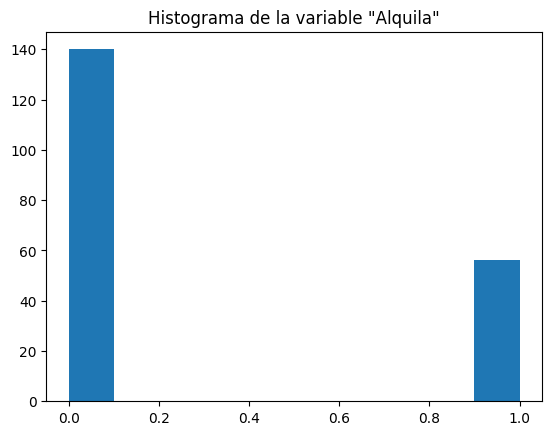

In [ ]:
plt.hist(datos['Alquila'])
plt.title('Histograma de la variable "Alquila"')

# Práctica 2. Encuesta Permanente de Hogares (EPH)

Cargamos la base de datos de la EPH Individual correspondiente al tercer trimestre del 2023:

In [ ]:
datos = pd.read_table("Bases/usu_individual_T323.txt", sep=";", decimal=",")
datos.head()

<ipython-input-19-b035e50a0c7f>:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_table("Bases/usu_individual_T323.txt", sep=";", decimal=",")


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPSSHJOKSCDEFOCD00804371,2023,3,1,5,1,41,N,8,341,...,2.0,4,24000.0,1,1.0,1,NaN,1.0,1,418
1,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,1,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
2,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,3,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
3,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,2,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
4,TQRMNOSQQHMMKUCDEIMBF00813017,2023,3,1,1,1,43,N,36,143,...,4.0,5,50000.0,2,2.0,2,NaN,2.0,2,168


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48335 entries, 0 to 48334
Columns: 177 entries, CODUSU to PONDIH
dtypes: float64(106), int64(66), object(5)
memory usage: 65.3+ MB


Vemos nombres de variables:

In [ ]:
datos.columns.values

array(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04',
       'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12',
       'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED',
       'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2',
       'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8',
       'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT',
       'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A',
       'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO',
       'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G',
       'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2',
       'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D',
       'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1',
       'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2',
       'PP07G3', 'PP07G4

### Descripción de variables

**CODUSU**: Código de identificación de la vivienda

**NRO_HOGAR**: Código de identificación del hogar

**COMPONENTE**: Número de componente: número de
orden que se asigna a las personas que
conforman cada hogar de la vivienda.

**AGLOMERADO**: Código de aglomerado

**CH04**: Sexo de la persona

**CH06**: Edad de la persona

**PP07H**: ¿Por ese trabajo tiene descuento jubilatorio? Si(1), No(2)

\

Para consultar el diseño de registro completo de la encuesta con la descripción y codificación de todas las variables puede consultar en el siguiente link https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_3T2023.pdf

### Filtrado de la base de datos

En primer lugar, filtramos los datos por la variable REGION para quedarnos con los relevamientos del Nordeste (código 41)

In [ ]:
datos_nea = datos[datos['REGION']==41]

Luego nos quedamos con las variables que son de interés a nuestro análisis:

In [ ]:
datos_nea = datos_nea[['CODUSU','NRO_HOGAR','COMPONENTE','AGLOMERADO','PONDERA','PONDIH',
                       'IPCF','CH04','CH06','NIVEL_ED','ESTADO','CAT_INAC', 'CAT_OCUP','PP07H']]
datos_nea.head(5)

,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,PONDIH,IPCF,CH04,CH06,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,PP07H
0,TQRMNOPSSHJOKSCDEFOCD00804371,1,5,8,341,418,24000.0,2,10,1,3,3,0,NaN
1,TQSMNORWTHJMKTCDEFOCD00804372,1,1,8,339,0,0.0,1,51,6,1,0,3,2.0
2,TQSMNORWTHJMKTCDEFOCD00804372,1,3,8,339,0,0.0,2,17,3,3,3,0,NaN
3,TQSMNORWTHJMKTCDEFOCD00804372,1,2,8,339,0,0.0,2,51,2,3,4,0,NaN
144,TQRMNOXUTHMOKPCDEGIBJ00809807,1,1,12,745,786,33250.0,2,29,4,1,0,2,0.0


### Modificación de nombres

In [ ]:
datos_nea.rename(columns = {'CH04' : 'SEXO', 'CH06' : 'EDAD'}, inplace=True)

## Análisis descriptivo

In [ ]:
datos_nea

,CODUSU,NRO_HOGAR,COMPONENTE,AGLOMERADO,PONDERA,PONDIH,IPCF,SEXO,EDAD,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,PP07H
0,TQRMNOPSSHJOKSCDEFOCD00804371,1,5,8,341,418,24000.0,2,10,1,3,3,0,NaN
1,TQSMNORWTHJMKTCDEFOCD00804372,1,1,8,339,0,0.0,1,51,6,1,0,3,2.0
2,TQSMNORWTHJMKTCDEFOCD00804372,1,3,8,339,0,0.0,2,17,3,3,3,0,NaN
3,TQSMNORWTHJMKTCDEFOCD00804372,1,2,8,339,0,0.0,2,51,2,3,4,0,NaN
144,TQRMNOXUTHMOKPCDEGIBJ00809807,1,1,12,745,786,33250.0,2,29,4,1,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48300,TQRMNOPYUHKMLPCDEFNFF00788119,1,1,7,206,0,0.0,1,66,6,3,1,0,NaN
48301,TQRMNOPYUHKMLPCDEFNFF00788119,1,2,7,206,0,0.0,2,65,6,1,0,2,0.0
48302,TQRMNOPYUHKMLPCDEFNFF00788119,1,3,7,206,0,0.0,1,29,6,1,0,2,0.0
48303,TQRMNOTPYHLOLQCDEFNFF00804237,1,1,7,276,382,95000.0,2,34,4,1,0,3,1.0


## Medidas de tendencia y dispersión

Algo a tener en cuenta con la EPH es que tiene ponderadores, es decir no podemos simplemente sacar medidas como ser la media y varianza de forma directa sino que hay que aplicarle antes unos ponderadores que ya vienen en la encuesta.

Tomemos por ejemplo el ingreso per cápita familiar IPCF, el ponderador adecuado es PONDIH. Primero tenemos que obtener la suma de cada valor de ingreso multiplicado por su correspondiente ponderador, luego dividimos por la suma total de ponderadores.

In [ ]:
suma_ingresos = sum(datos_nea['IPCF']*datos_nea['PONDIH'])
n = sum(datos_nea['PONDIH'])
media_muestral = suma_ingresos/n

media_muestral

88925.92641214159

Nuevamente Python nos facilita esto con funciones ya establecidas.

In [ ]:
np.average(datos_nea['IPCF'], weights=datos_nea['PONDIH'])

88925.92641214155

De forma similar se trabaja con la varianza, aplicandole la ponderación correspondiente.

In [ ]:
sumas_cuadradas = (datos_nea['IPCF'] - media_muestral)**2
sumas_cuadradas_pond = sumas_cuadradas*datos_nea['PONDIH']
suma_cuadrada = sum(sumas_cuadradas_pond)
varianza_muestral = suma_cuadrada/(n-1)
varianza_muestral

5869694076.03051

Para calcular la varianza no existe a priori funcion en numpy pero si en otra librería bastante usada en análisis estadísticos que es statsmodels. El parámetro ddof=1 es para indicarle que queremos la varianza muestral y no la poblacional.

In [ ]:
DescrStatsW(datos_nea['IPCF'], weights=datos_nea['PONDIH'], ddof=1).var

5869690050.817734

El desvío estandar por su parte es simplemente aplicarle la raíz cuadrada a lo anterior.

In [ ]:
desvio_estandar_muestral = np.sqrt(varianza_muestral)
desvio_estandar_muestral

76613.92873381778

In [ ]:
DescrStatsW(datos_nea['IPCF'], weights=datos_nea['PONDIH'], ddof=1).std

76613.92873381778

Calculamos el coeficiente de variación CV.

In [ ]:
cv = desvio_estandar_muestral/media_muestral
cv

0.8615477153281276

Graficamos un histograma.

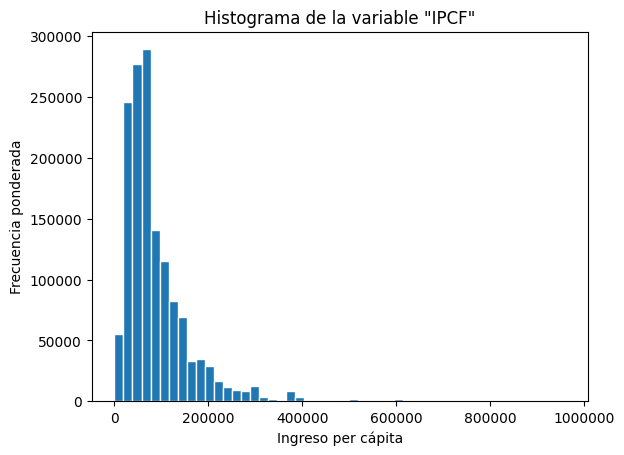

In [ ]:
plt.hist(datos_nea['IPCF'], weights=datos_nea['PONDIH'], bins=50, edgecolor = "white")
plt.xlabel('Ingreso per cápita')
plt.ylabel('Frecuencia ponderada')
plt.title('Histograma de la variable "IPCF"')
plt.ticklabel_format(style='plain') # Para anular la notación científica en los ejes
plt.show()

Si observamos el histograma anterior podemos apreciar que el ingreso no aparentaría distribuirse normal. Se observa una asimetría hacia la derecha, es decir mucha concentración en ingresos bajos y poca en ingresos altos.

Un criterio práctico para aproximar la distribución a una normal en estos casos es aplicarle logartimos a los datos.

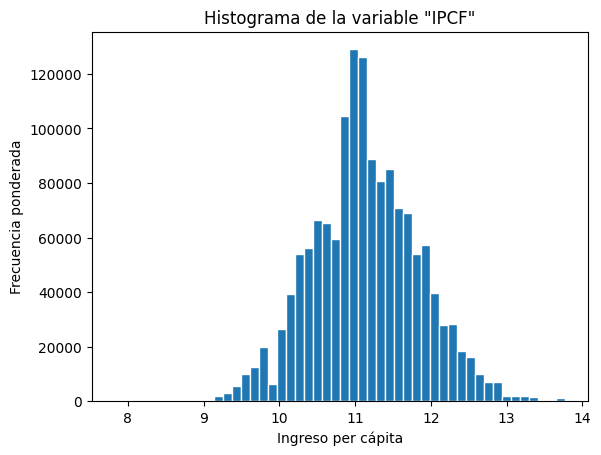

In [ ]:
datos_nea['IPCF_log'] = np.log(datos_nea['IPCF'])

plt.hist(datos_nea[datos_nea['IPCF']>0]['IPCF_log'], weights=datos_nea[datos_nea['IPCF']>0]['PONDIH'], bins=50, edgecolor = "white")
plt.xlabel('Ingreso per cápita')
plt.ylabel('Frecuencia ponderada')
plt.title('Histograma del logaritmo de "IPCF"')
plt.ticklabel_format(style='plain')
plt.show()

## Probabilidades

Con la base de la eph podemos obtener probabilidades básicas, como por ejemplo la probabilidad de que un trabajador en relación de dependencia sea informal.

Lo que tenemos que obtener entonces es el total de trabajadores en relación de dependencia que sean informales y simplemente dividir por el total de los mismos. Para filtrar a los trabajadores primero utilizamos la variable **CAT_OCUP** igual a **3**, luego obtenemos los informales con una variable proxy que es PP07H, la misma nos indica si a el trabajador le descuenta aportes jubilatorios.

In [ ]:
datos_nea['informalidad'] = (datos_nea['PP07H'] - 1)

In [ ]:
trabajadores_informales = sum(datos_nea[(datos_nea['CAT_OCUP']==3) & (datos_nea['informalidad']==1)]['PONDERA'])
trabajadores = sum(datos_nea[(datos_nea['CAT_OCUP']==3) & (datos_nea['informalidad']>=0)]['PONDERA'])

probabilidad_informal = trabajadores_informales/trabajadores
probabilidad_informal

0.41773656895897

Aplicando un promedio ponderado a la variable de informalidad llegamos al mismo resultado.

In [ ]:
np.average(datos_nea[(datos_nea['CAT_OCUP']==3) & (datos_nea['informalidad']>=0)]['informalidad'],
           weights=datos_nea[(datos_nea['CAT_OCUP']==3) & (datos_nea['informalidad']>=0)]['PONDERA'])

0.41773656895897

La probabilidad anterior se puede tomar como la esperanza de una distribución binomial con N=1 y probabilidad 0.417 de ser informalidad. O lo que vendría a ser el caso una Bernoulli con p=0.417.